<a href="https://colab.research.google.com/github/MaInthiyaz/OasisInfobite_Data-analytics/blob/main/Predicting_House_Prices_with_Linear_Regression(Housing)P5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Idea: **Predicting House Prices with Linear Regression**


**Description:**

The objective of this project is to build a predictive model using linear regression to estimate a
numerical outcome based on a dataset with relevant features. Linear regression is a
fundamental machine learning algorithm, and this project provides hands-on experience in
developing, evaluating, and interpreting a predictive model.



**Key Concepts and Challenges:**

**Data Collection:** Obtain a dataset with numerical features and a target variable for
prediction.
**Data Exploration and Cleaning:** Explore the dataset to understand its structure, handle
missing values, and ensure data quality.
**Feature Selection:** Identify relevant features that may contribute to the predictive model.
**Model Training:** Implement linear regression using a machine learning library (e.g., Scikit-
Learn).
**Model Evaluation:** Evaluate the model's performance on a separate test dataset using
metrics such as Mean Squared Error or R-squared.
**Visualization:** Create visualizations to illustrate the relationship between the predicted and
actual values.


Learning Objectives: **bold text**

Understanding of linear regression concepts.
Practical experience in implementing a predictive model.
Model evaluation and interpretation skills

In [3]:
import pandas as pd  # Import pandas for data manipulation
import numpy as np  # Import numpy for numerical operations
import matplotlib.pyplot as plt  # Import matplotlib for data visualization
import seaborn as sns  # Import seaborn for advanced visualizations
from sklearn.model_selection import train_test_split  # Function to split data into train and test sets
from sklearn.linear_model import LinearRegression  # Import Linear Regression model from scikit-learn
from sklearn.metrics import mean_squared_error, r2_score  # Metrics to evaluate model performance

# Step 1: Load Dataset

data = pd.read_csv("Housing.csv")  # Load the housing dataset into a DataFrame
print("Dataset Shape:", data.shape)  # Print the number of rows and columns
print(data.head())  # Display the first few rows of the dataset

Dataset Shape: (545, 13)
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [4]:

# Step 2: Data Exploration & Cleaning
print(data.info())  # Show data types and missing values summary
print(data.describe())  # Get basic statistical overview

# Dropping rows with missing values (if any)
data = data.dropna()  # Remove missing value row

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mea

In [5]:

# Step 3: Feature Selection

# Assume 'price' is the target variable and all others are features
X = data.drop('price', axis=1)  # Features for prediction
y = data['price']  # Target variable (house price)

# If there are categorical variables, perform one-hot encoding
X = pd.get_dummies(X, drop_first=True)

In [6]:

# Step 4: Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split data 80% train, 20% test

In [7]:

# Step 5: Model Training

model = LinearRegression()  # Initialize Linear Regression model
model.fit(X_train, y_train)  # Train the model on training data

LinearRegression()

In [8]:

# Step 6: Model Prediction

y_pred = model.predict(X_test)  # Predict house prices on test data

In [9]:

# Step 7: Model Evaluation

mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
r2 = r2_score(y_test, y_pred)  # Calculate R-squared value
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 1754318687330.6638
R-squared Score: 0.6529242642153184


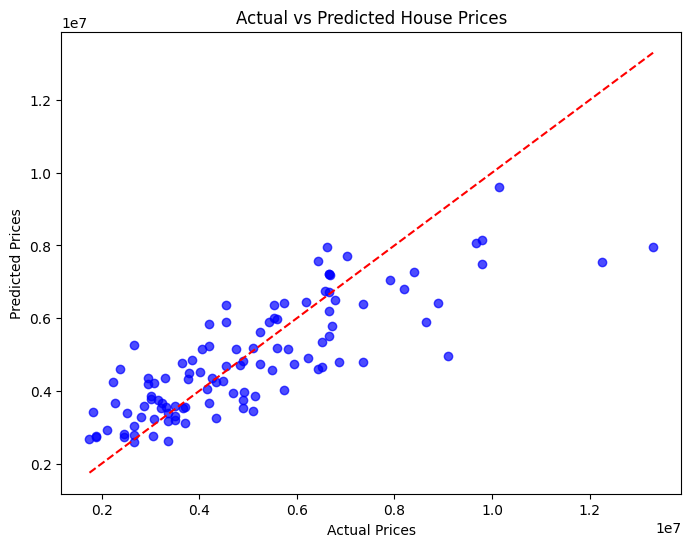

In [10]:

# Step 8: Visualization

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')  # Scatter plot of Actual vs Predicted
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line showing perfect prediction
plt.show()